In [73]:
from py2neo import Graph
from IPython.display import Image


In [74]:
graph = Graph("bolt://localhost:7687", auth=("neo4j", "matilda123"), name = "fears")

# Data Profiling

### schema

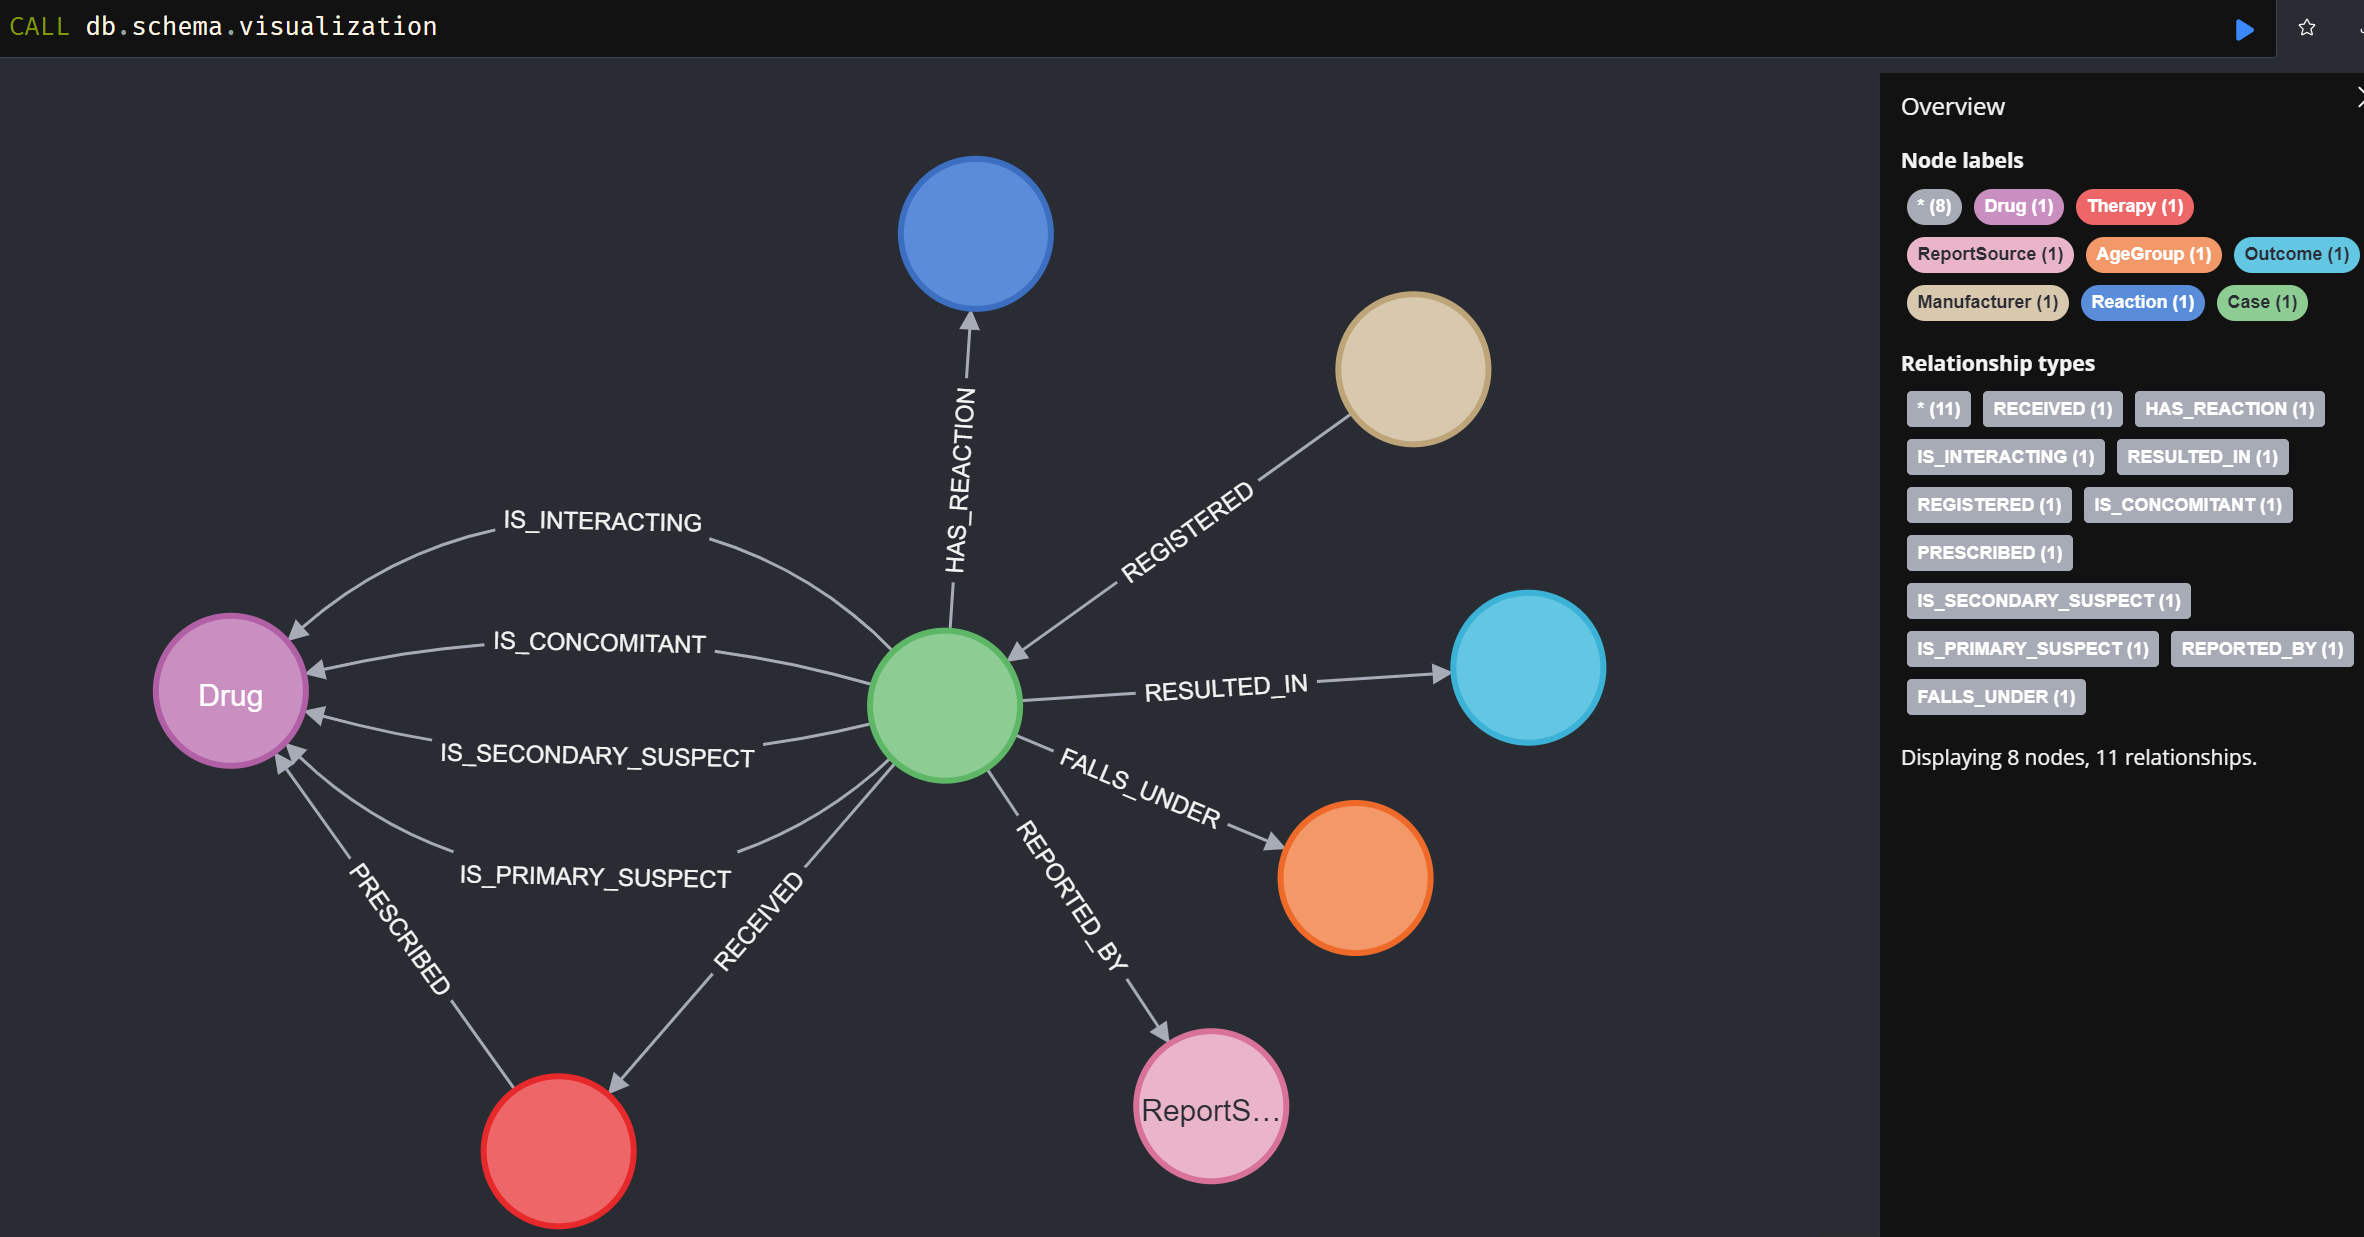

In [76]:
Image(filename='img/visualization.png')

# Node properties 

In [29]:
graph.run("CALL db.schema.nodeTypeProperties")


nodeType,nodeLabels,propertyName,propertyTypes,mandatory
:`Case`,['Case'],primaryid,['Long'],true
:`Case`,['Case'],age,['Double'],true
:`Case`,['Case'],ageUnit,['String'],true


# Edge properties 

In [77]:
graph.run("CALL db.schema.relTypeProperties")

relType,propertyName,propertyTypes,mandatory
:`REGISTERED`,null,null,false
:`FALLS_UNDER`,null,null,false
:`RESULTED_IN`,null,null,false


## Count Nodes

In [78]:
graph.run("MATCH (n) RETURN COUNT(n) as TotalNodes")


TotalNodes
11381


## count relationships

In [94]:
graph.run("MATCH ()-->() RETURN count(*)")

count(*)
61453


## What nodes and relations?

- MATCH (n): This matches all nodes in the database.
- Labels are nodes in neo4j
- 

In [80]:
graph.run("MATCH (n) RETURN COUNT(DISTINCT n.name)") # Noly nodes with name property, how many uniques?


COUNT(DISTINCT n.name)
2505


# List all the nodes

In [86]:
nodes = graph.run("MATCH (n) RETURN DISTINCT labels(n)  AS NODES_in_graph")

In [87]:
[i for i in nodes]

[Record({'NODES_in_graph': ['Case']}),
 Record({'NODES_in_graph': ['Manufacturer']}),
 Record({'NODES_in_graph': ['AgeGroup']}),
 Record({'NODES_in_graph': ['Outcome']}),
 Record({'NODES_in_graph': ['Reaction']}),
 Record({'NODES_in_graph': ['ReportSource']}),
 Record({'NODES_in_graph': ['Drug']}),
 Record({'NODES_in_graph': ['Therapy']})]

In [90]:
labels = graph.run("CALL db.labels")
[i for i in labels]

[Record({'label': 'Drug'}),
 Record({'label': 'Case'}),
 Record({'label': 'Reaction'}),
 Record({'label': 'ReportSource'}),
 Record({'label': 'Outcome'}),
 Record({'label': 'Therapy'}),
 Record({'label': 'Manufacturer'}),
 Record({'label': 'AgeGroup'})]

In [95]:
## Relationships (edges)
graph.run("MATCH (n)-[r]->(d) RETURN DISTINCT type(r) as relsssssssssss")                      # Node, relattion, destination

relsssssssssss
IS_CONCOMITANT
IS_SECONDARY_SUSPECT
IS_PRIMARY_SUSPECT


In [92]:
labels = graph.run("CALL db.relationshipTypes()")
[i for i in labels]

[Record({'relationshipType': 'REGISTERED'}),
 Record({'relationshipType': 'FALLS_UNDER'}),
 Record({'relationshipType': 'RESULTED_IN'}),
 Record({'relationshipType': 'HAS_REACTION'}),
 Record({'relationshipType': 'REPORTED_BY'}),
 Record({'relationshipType': 'IS_PRIMARY_SUSPECT'}),
 Record({'relationshipType': 'IS_SECONDARY_SUSPECT'}),
 Record({'relationshipType': 'IS_CONCOMITANT'}),
 Record({'relationshipType': 'IS_INTERACTING'}),
 Record({'relationshipType': 'RECEIVED'}),
 Record({'relationshipType': 'PRESCRIBED'})]

## Node Distribution

In [96]:
graph.run("""MATCH (n)
RETURN
DISTINCT labels(n), COUNT(*) AS NumberOfNodes""")


labels(n),NumberOfNodes
['Case'],4307
['Manufacturer'],136
['AgeGroup'],5


##  So. `AgeGroup` has 5 unique values, What are they

In [100]:
out = graph.run("MATCH (n:AgeGroup) RETURN (n)")

In [102]:
[i for i in out]

[Record({'n': Node('AgeGroup', ageGroup='Adult')}),
 Record({'n': Node('AgeGroup', ageGroup='Elderly')}),
 Record({'n': Node('AgeGroup', ageGroup='Adolescent')}),
 Record({'n': Node('AgeGroup', ageGroup='Child')}),
 Record({'n': Node('AgeGroup', ageGroup='Infant')})]

## for Specific Node?
Here only `Case` node type results

In [97]:
case_node = graph.run("MATCH (n:Case) RETURN n")  # Case is a node type
case_node

n
"(_0:Case {age: 56.0, ageUnit: 'YR', eventDate: date('2014-03-25'), gender: 'F', primaryid: 100654764, reportDate: date('2021-08-27'), reporterOccupation: 'Physician'})"
"(_1:Case {age: 53.0, ageUnit: 'YR', eventDate: date('2014-05-03'), gender: 'F', primaryid: 101678656, reportDate: date('2021-09-13'), reporterOccupation: 'Physician'})"
"(_2:Case {age: 77.0, ageUnit: 'YR', eventDate: date('2010-12-27'), gender: 'M', primaryid: 101980392, reportDate: date('2021-08-25'), reporterOccupation: 'Hospital'})"


In [52]:
[i for i in case_node]

[Record({'n': Node('Case', age=56.0, ageUnit='YR', eventDate=Date(2014, 3, 25), gender='F', primaryid=100654764, reportDate=Date(2021, 8, 27), reporterOccupation='Physician')}),
 Record({'n': Node('Case', age=53.0, ageUnit='YR', eventDate=Date(2014, 5, 3), gender='F', primaryid=101678656, reportDate=Date(2021, 9, 13), reporterOccupation='Physician')}),
 Record({'n': Node('Case', age=77.0, ageUnit='YR', eventDate=Date(2010, 12, 27), gender='M', primaryid=101980392, reportDate=Date(2021, 8, 25), reporterOccupation='Hospital')}),
 Record({'n': Node('Case', age=60.0, ageUnit='YR', eventDate=Date(2013, 6, 14), gender='M', primaryid=103011729, reportDate=Date(2021, 7, 20), reporterOccupation='Hospital')}),
 Record({'n': Node('Case', age=31.0, ageUnit='YR', eventDate=Date(2014, 3, 25), gender='M', primaryid=103829296, reportDate=Date(2021, 9, 25), reporterOccupation='Pharmacist')}),
 Record({'n': Node('Case', age=49.0, ageUnit='YR', eventDate=Date(2014, 9, 5), gender='M', primaryid=104456557,

## Specific Node properties

In [105]:
graph.run("MATCH (n:Drug) RETURN properties(n)")

properties(n)
"{primarySubstabce: 'EVEROLIMUS', name: 'AFINITOR'}"
"{primarySubstabce: 'SORAFENIB', name: 'SORAFENIB'}"
"{primarySubstabce: 'CLONAZEPAM', name: 'CLONAZEPAM'}"


In [70]:
graph.run("""MATCH (n) WHERE rand() <= 0.1
RETURN
DISTINCT labels(n),
count(*) AS SampleSize,
avg(size(keys(n))) as Avg_PropertyCount,
min(size(keys(n))) as Min_PropertyCount,
max(size(keys(n))) as Max_PropertyCount,
avg(size( (n)-[]-() ) ) as Avg_RelationshipCount,
min(size( (n)-[]-() ) ) as Min_RelationshipCount,
max(size( (n)-[]-() ) ) as Max_RelationshipCount""")

labels(n),SampleSize,Avg_PropertyCount,Min_PropertyCount,Max_PropertyCount,Avg_RelationshipCount,Min_RelationshipCount,Max_RelationshipCount
['Case'],424,7.0,7,7,12.957547169811326,5,71
['Manufacturer'],13,1.0,1,1,11.153846153846153,1,63
['AgeGroup'],1,1.0,1,1,2103.0,2103,2103


# To retrieve all nodes along with their `labels` and `properties`:

In [112]:
query = "MATCH (n) RETURN n"
result = graph.run(query) # Only sample records
result



n
"(_0:Case {age: 56.0, ageUnit: 'YR', eventDate: date('2014-03-25'), gender: 'F', primaryid: 100654764, reportDate: date('2021-08-27'), reporterOccupation: 'Physician'})"
"(_1:Case {age: 53.0, ageUnit: 'YR', eventDate: date('2014-05-03'), gender: 'F', primaryid: 101678656, reportDate: date('2021-09-13'), reporterOccupation: 'Physician'})"
"(_2:Case {age: 77.0, ageUnit: 'YR', eventDate: date('2010-12-27'), gender: 'M', primaryid: 101980392, reportDate: date('2021-08-25'), reporterOccupation: 'Hospital'})"


In [113]:
frame = pd.DataFrame([record['n'] for record in result])
frame.head(10)

,gender,reportDate,ageUnit,reporterOccupation,primaryid,age,eventDate,manufacturerName,ageGroup,code,outcome,description,name,primarySubstabce
0,F,2021-08-27,YR,Physician,100654764.0,56.0,2014-03-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,F,2021-09-13,YR,Physician,101678656.0,53.0,2014-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,M,2021-08-25,YR,Hospital,101980392.0,77.0,2010-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,M,2021-07-20,YR,Hospital,103011729.0,60.0,2013-06-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,M,2021-09-25,YR,Pharmacist,103829296.0,31.0,2014-03-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,M,2021-08-12,YR,Consumer,104456557.0,49.0,2014-09-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,F,2021-08-26,YR,Physician,104803043.0,52.0,2014-09-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,F,2021-09-08,YR,Physician,104833856.0,51.0,2014-08-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,F,2021-09-01,YR,Hospital,107082202.0,76.0,2014-09-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,M,2021-09-01,YR,Hospital,107341882.0,67.0,2014-12-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## To retrieve all relationships along with their `types` and `properties`

In [125]:
query  = "MATCH ()-[r]->() RETURN r"
relationships = graph.run(query)
relationships

r
"(_0)-[:IS_CONCOMITANT {doseAmount: '25', doseUnit: 'MG', drugSequence: '7', indication: 'Unknown', route: 'Oral'}]->(METOPROLOL SUCCINATE)"
"(_0)-[:IS_CONCOMITANT {doseAmount: '8', doseUnit: 'MG', drugSequence: '8', indication: 'Unknown', route: 'Oral'}]->(ONDANSETRON)"
"(_0)-[:IS_CONCOMITANT {doseAmount: '20', doseUnit: 'MG', drugSequence: '6', indication: 'Unknown', route: 'Oral'}]->(LISINOPRIL)"


In [126]:
graph.run(""" 
            MATCH ()-[r]->() RETURN type(r) AS relationshipType, r.drugSequence, r.route, r.indication, r.doseUnit, r.doseAmount""")


relationshipType,r.drugSequence,r.route,r.indication,r.doseUnit,r.doseAmount
IS_CONCOMITANT,7,Oral,Unknown,MG,25
IS_CONCOMITANT,8,Oral,Unknown,MG,8
IS_CONCOMITANT,6,Oral,Unknown,MG,20


### NOTES 
- `type` is `relationshipType`  ---> MATCH ()-[r]->() RETURN type(r)

- `labels` is `nodes`           ---> MATCH (n) RETURN labels(n) 

In [129]:
graph.run("MATCH (n) RETURN labels(n)")

labels(n)
['Case']
['Case']
['Case']


In [134]:
graph.run("""MATCH (n)
RETURN
DISTINCT labels(n) AS nodeLabels""")

nodeLabels
['Case']
['Manufacturer']
['AgeGroup']


# Nodes and properties
### Nodes and its attached relationships

In [139]:
#Nodes and its attached relationships
query = "MATCH (n) UNWIND labels(n) as oyo WITH oyo, keys(n) as types RETURN DISTINCT oyo, types"
graph.run(query)


oyo,types
Case,"['reporterOccupation', 'gender', 'eventDate', 'reportDate', 'primaryid', 'age', 'ageUnit']"
Manufacturer,['manufacturerName']
AgeGroup,['ageGroup']


In [143]:
[i for i in structure_df]

[Record({'oyo': 'Manufacturer', 'types': ['manufacturerName']}),
 Record({'oyo': 'AgeGroup', 'types': ['ageGroup']}),
 Record({'oyo': 'Outcome', 'types': ['outcome', 'code']}),
 Record({'oyo': 'Reaction', 'types': ['description']}),
 Record({'oyo': 'ReportSource', 'types': ['code', 'name']}),
 Record({'oyo': 'Drug', 'types': ['primarySubstabce', 'name']}),
 Record({'oyo': 'Drug', 'types': ['name', 'primarySubstabce']}),
 Record({'oyo': 'Drug', 'types': ['name']}),
 Record({'oyo': 'Therapy', 'types': ['primaryid']})]

In [145]:
structure_df = graph.run(query)
pd.DataFrame([i['oyo'] for i in structure_df])

,0
0,Case
1,Manufacturer
2,AgeGroup
3,Outcome
4,Reaction
5,ReportSource
6,Drug
7,Drug
8,Drug
9,Therapy


In [149]:
out = graph.run( """ MATCH ()-[r]->()
    WITH type(r) AS type, keys(r) AS properties
    UNWIND properties AS property
    RETURN DISTINCT type AS relType, property AS propertyName
    """)

In [151]:
[i for i in out]

[Record({'relType': 'IS_CONCOMITANT', 'propertyName': 'indication'}),
 Record({'relType': 'IS_CONCOMITANT', 'propertyName': 'doseAmount'}),
 Record({'relType': 'IS_CONCOMITANT', 'propertyName': 'doseUnit'}),
 Record({'relType': 'IS_CONCOMITANT', 'propertyName': 'drugSequence'}),
 Record({'relType': 'IS_CONCOMITANT', 'propertyName': 'route'}),
 Record({'relType': 'IS_SECONDARY_SUSPECT', 'propertyName': 'indication'}),
 Record({'relType': 'IS_SECONDARY_SUSPECT', 'propertyName': 'doseAmount'}),
 Record({'relType': 'IS_SECONDARY_SUSPECT', 'propertyName': 'doseUnit'}),
 Record({'relType': 'IS_SECONDARY_SUSPECT', 'propertyName': 'drugSequence'}),
 Record({'relType': 'IS_SECONDARY_SUSPECT', 'propertyName': 'route'}),
 Record({'relType': 'IS_PRIMARY_SUSPECT', 'propertyName': 'indication'}),
 Record({'relType': 'IS_PRIMARY_SUSPECT', 'propertyName': 'doseAmount'}),
 Record({'relType': 'IS_PRIMARY_SUSPECT', 'propertyName': 'doseUnit'}),
 Record({'relType': 'IS_PRIMARY_SUSPECT', 'propertyName': 'd

In [152]:
def get_node_labels():
    query = "MATCH (n) RETURN DISTINCT labels(n) AS labels"
    result = graph.run(query)
    return [record["labels"] for record in result]
get_node_labels()

[['Case'],
 ['Manufacturer'],
 ['AgeGroup'],
 ['Outcome'],
 ['Reaction'],
 ['ReportSource'],
 ['Drug'],
 ['Therapy']]

In [153]:
def get_relationship_types():
    query = "MATCH ()-[r]->() RETURN DISTINCT type(r) AS relationshipTypes"
    result = graph.run(query)
    return [record["relationshipTypes"] for record in result]
get_relationship_types()

['IS_CONCOMITANT',
 'IS_SECONDARY_SUSPECT',
 'IS_PRIMARY_SUSPECT',
 'REPORTED_BY',
 'HAS_REACTION',
 'RESULTED_IN',
 'FALLS_UNDER',
 'RECEIVED',
 'REGISTERED',
 'IS_INTERACTING',
 'PRESCRIBED']

In [154]:
def get_node_properties():
    query = """
    MATCH (n)
    UNWIND labels(n) AS label
    WITH label, keys(n) AS properties
    UNWIND properties AS property
    RETURN DISTINCT label AS nodeType, property AS propertyName
    """
    result = graph.run(query)
    node_properties = []
    for record in result:
        node_properties.append({
            "nodeType": record["nodeType"],
            "propertyName": record["propertyName"]
        })
    return node_properties
get_node_properties()

[{'nodeType': 'Case', 'propertyName': 'reporterOccupation'},
 {'nodeType': 'Case', 'propertyName': 'gender'},
 {'nodeType': 'Case', 'propertyName': 'eventDate'},
 {'nodeType': 'Case', 'propertyName': 'reportDate'},
 {'nodeType': 'Case', 'propertyName': 'primaryid'},
 {'nodeType': 'Case', 'propertyName': 'age'},
 {'nodeType': 'Case', 'propertyName': 'ageUnit'},
 {'nodeType': 'Manufacturer', 'propertyName': 'manufacturerName'},
 {'nodeType': 'AgeGroup', 'propertyName': 'ageGroup'},
 {'nodeType': 'Outcome', 'propertyName': 'outcome'},
 {'nodeType': 'Outcome', 'propertyName': 'code'},
 {'nodeType': 'Reaction', 'propertyName': 'description'},
 {'nodeType': 'ReportSource', 'propertyName': 'code'},
 {'nodeType': 'ReportSource', 'propertyName': 'name'},
 {'nodeType': 'Drug', 'propertyName': 'primarySubstabce'},
 {'nodeType': 'Drug', 'propertyName': 'name'},
 {'nodeType': 'Therapy', 'propertyName': 'primaryid'}]

In [155]:
def get_relationship_properties():
    query = """
    MATCH ()-[r]->()
    WITH type(r) AS type, keys(r) AS properties
    UNWIND properties AS property
    RETURN DISTINCT type AS relType, property AS propertyName
    """
    result = graph.run(query)
    rel_properties = []
    for record in result:
        rel_properties.append({
            "relType": record["relType"],
            "propertyName": record["propertyName"]
        })
    return rel_properties
get_relationship_properties()


[{'relType': 'IS_CONCOMITANT', 'propertyName': 'indication'},
 {'relType': 'IS_CONCOMITANT', 'propertyName': 'doseAmount'},
 {'relType': 'IS_CONCOMITANT', 'propertyName': 'doseUnit'},
 {'relType': 'IS_CONCOMITANT', 'propertyName': 'drugSequence'},
 {'relType': 'IS_CONCOMITANT', 'propertyName': 'route'},
 {'relType': 'IS_SECONDARY_SUSPECT', 'propertyName': 'indication'},
 {'relType': 'IS_SECONDARY_SUSPECT', 'propertyName': 'doseAmount'},
 {'relType': 'IS_SECONDARY_SUSPECT', 'propertyName': 'doseUnit'},
 {'relType': 'IS_SECONDARY_SUSPECT', 'propertyName': 'drugSequence'},
 {'relType': 'IS_SECONDARY_SUSPECT', 'propertyName': 'route'},
 {'relType': 'IS_PRIMARY_SUSPECT', 'propertyName': 'indication'},
 {'relType': 'IS_PRIMARY_SUSPECT', 'propertyName': 'doseAmount'},
 {'relType': 'IS_PRIMARY_SUSPECT', 'propertyName': 'doseUnit'},
 {'relType': 'IS_PRIMARY_SUSPECT', 'propertyName': 'drugSequence'},
 {'relType': 'IS_PRIMARY_SUSPECT', 'propertyName': 'route'},
 {'relType': 'IS_INTERACTING', 'pro